In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df_full = pd.read_csv('BTC.csv')
df_full.pop('Currency')

0      BTC
1      BTC
2      BTC
3      BTC
4      BTC
      ... 
161    BTC
162    BTC
163    BTC
164    BTC
165    BTC
Name: Currency, Length: 166, dtype: object

In [11]:
df_full =df_full.head(100)
df_full

,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Close
0,1/1/2021,29111.52157,28872.82977,29280.04533,27916.62506,2.911152
1,1/2/2021,29333.60512,28935.81098,29601.59490,28753.41231,2.933361
2,1/3/2021,32154.16736,29353.64061,33064.67353,29012.92789,3.215417
3,1/4/2021,33002.53643,32074.10661,34452.08034,31885.58162,3.300254
4,1/5/2021,31431.61228,32788.58345,33358.39935,28154.11030,3.143161
...,...,...,...,...,...,...
95,4/6/2021,58843.55954,58230.67554,59243.03618,56846.96905,5.884356
96,4/7/2021,58040.18760,59133.65574,59484.19947,57421.85309,5.804019
97,4/8/2021,56508.94286,58030.62185,58645.77297,55541.90613,5.650894
98,4/9/2021,57880.90568,55996.08036,58179.65686,55758.49118,5.788091


In [12]:
#Hành động mua
# Nếu tiền != 0 
def buy(btc_price, btc, money):
    if(money != 0):
        #Số đồng BTC 1/giá_close ngày hôm đó*100
        #Ví dụ: Ngày 1//1/2021 Giá Close là 2.911152 ta lấy 1/2.911*money = 0.3435*money tức ta có 34 BTC
        btc = (1 / btc_price ) * money
        #Mua xong thì money = 0
        money = 0
    return btc, money

#Hành động bán
# Nếu btc !=0
def sell(btc_price, btc, money):
    if(btc != 0):
        #Số tiền bằng giá close hiện tại*BTC
        money = btc_price * btc
        #Bán xong BTC = 0
        btc = 0
    return btc, money

#Hành động chờ
def wait(btc_price, btc, money):
    # do nothing
    return btc, money

In [14]:
#Lấy ra danh sách giá của BTC
prices = df_full['Close']
prices

0     2.911152
1     2.933361
2     3.215417
3     3.300254
4     3.143161
        ...   
95    5.884356
96    5.804019
97    5.650894
98    5.788091
99    5.817191
Name: Close, Length: 100, dtype: float64

In [15]:
np.random.seed(9001)
np.random.rand(1)

array([0.09220363])

In [16]:
np.random.seed(9001)
np.random.rand(1)

array([0.09220363])

In [17]:
np.random.seed(9002)
np.random.rand(1)

array([0.25435161])

In [35]:
#Create Action

np.random.seed(1)

# set of actions that the user could do
actions = { 'buy' : buy, 'sell': sell, 'wait' : wait}

actions_to_nr = { 'buy' : 0, 'sell' : 1, 'wait' : 2 }

nr_to_actions = { k:v for (k,v) in enumerate(actions_to_nr) }

nr_actions = len(actions_to_nr.keys())
nr_states = len(prices)

# q-table = reference table for our agent to select the best action based on the q-value
q_table = np.random.rand(nr_states, nr_actions)

In [36]:
actions

{'buy': <function __main__.buy(btc_price, btc, money)>,
 'sell': <function __main__.sell(btc_price, btc, money)>,
 'wait': <function __main__.wait(btc_price, btc, money)>}

In [37]:
actions_to_nr

{'buy': 0, 'sell': 1, 'wait': 2}

In [19]:
#Giải thích hàm  enumerate

In [20]:
nr_to_actions

{0: 'buy', 1: 'sell', 2: 'wait'}

In [38]:
#Bao nhiêu cái giá là bao nhiêu state, bao nhiêu hành động là bao nhiêu action
q_table

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04],
       [3.02332573e-01, 1.46755891e-01, 9.23385948e-02],
       [1.86260211e-01, 3.45560727e-01, 3.96767474e-01],
       [5.38816734e-01, 4.19194514e-01, 6.85219500e-01],
       [2.04452250e-01, 8.78117436e-01, 2.73875932e-02],
       [6.70467510e-01, 4.17304802e-01, 5.58689828e-01],
       [1.40386939e-01, 1.98101489e-01, 8.00744569e-01],
       [9.68261576e-01, 3.13424178e-01, 6.92322616e-01],
       [8.76389152e-01, 8.94606664e-01, 8.50442114e-02],
       [3.90547832e-02, 1.69830420e-01, 8.78142503e-01],
       [9.83468338e-02, 4.21107625e-01, 9.57889530e-01],
       [5.33165285e-01, 6.91877114e-01, 3.15515631e-01],
       [6.86500928e-01, 8.34625672e-01, 1.82882773e-02],
       [7.50144315e-01, 9.88861089e-01, 7.48165654e-01],
       [2.80443992e-01, 7.89279328e-01, 1.03226007e-01],
       [4.47893526e-01, 9.08595503e-01, 2.93614148e-01],
       [2.87775339e-01, 1.30028572e-01, 1.93669579e-02],
       [6.78835533e-01, 2.11628

In [21]:
#Hàm này là hàm phần thưởng
#Giải thích
#----------
# 1. before_btc: Giá BTC trước hành động
# 2. btc: btc hiện tại sau khi hành động
# 3. before_money: money trước hành động
# 4. money: money sau hành động
#----------
def get_reward(before_btc, btc, before_money, money):
    #reward ban khởi tạo = 0
    reward = 0
    #btc trước mà < btc sau thì được 1 điểm
    if(btc != 0):
        if(before_btc < btc):
            reward = 1
    #money trước mà < money sau thì được 1 điểm
    if(money != 0):
        if(before_money < money):
            reward = 1 
    return reward

In [39]:
#Hành động chọn action tại state
def choose_action(state):
    #if 1 số random trong đoạn (0,1) < eps(0.3) thì bắt đầu random một hành động từ 0-->2
    if np.random.uniform(0, 1) < eps:
        return np.random.randint(0, 2)
    #Trường hợp ngược lại thì lấy argmax của hàm q_table[state] cao nhất
    else:
        return np.argmax(q_table[state])

In [53]:
q_table[state]

array([0.07962608, 0.98281711, 0.18161285])

In [ ]:
#Chọn hành động số 1 vì hành động số 1 có Q-Value cao nhất

In [42]:
def take_action(state, action):
    return actions[nr_to_actions[action]](prices[state], btc, money)

In [60]:
#Khi nhập action = 0 thì trả về hành động buy
actions[nr_to_actions[0]]

<function __main__.buy(btc_price, btc, money)>

In [61]:
(prices[1], btc, money)

(2.9333605119999997, 0, 100)

In [62]:
actions[nr_to_actions[0]](prices[1], btc, money)

(34.09059322606713, 0)

In [63]:
nr_states

100

In [24]:
#hàm act
# Truyển tham số state, action, theta
# state hiện tại, action hành động với state đó bằng hàm choose action thực hiện ở đâu đó bỏ vào
# theta = (btc,money)
def act(state, action, theta):
    btc, money = theta
    #Hoàn thành = False
    done = False
    #State mới = state cũ + 1
    new_state = state + 1
    #Giá trước bằng btc hiện tại, money hiện tại
    before_btc, before_money = btc, money
    #Giá sau bằng take_action state với action
    btc, money = take_action(state, action)
    theta = btc, money
    #Get phần thưởng với btc mới và money mới vừa tạo
    reward = get_reward(before_btc, btc, before_money, money)
    #Điều kiện dừng học
    if(new_state == nr_states):
        done = True
    
    return new_state, reward, theta, done

In [25]:
#Ban đầu reward là 0, btc = 0, money = 100*10000USD
reward = 0
btc = 0
money = 100

theta = btc, money

#Theta =(btc,money)--> ma trận 1x1 tiền ảo và tiền thật

In [26]:
# exploratory
eps = 0.3

#Số lần học
n_episodes = 20

min_alpha = 0.02

# learning rate for Q learning
alphas = np.linspace(1.0, min_alpha, n_episodes)

# discount factor, used to balance immediate and future reward
gamma = 1.0

In [54]:
rewards = {}

for e in range(n_episodes):
    
    total_reward = 0
    
    state = 0
    done = False
    alpha = alphas[e]
    
    while(done != True):

        action = choose_action(state)
        next_state, reward, theta, done = act(state, action, theta)
        
        total_reward += reward
        
        if(done):
            rewards[e] = total_reward
            print(f"Episode {e + 1}: total reward -> {total_reward}")
            break
        
        q_table[state][action] = q_table[state][action] + alpha * (reward + gamma *  np.max(q_table[next_state]) - q_table[state][action])

        state = next_state

Episode 1: total reward -> 52
Episode 2: total reward -> 53
Episode 3: total reward -> 62
Episode 4: total reward -> 69
Episode 5: total reward -> 60
Episode 6: total reward -> 68
Episode 7: total reward -> 72
Episode 8: total reward -> 74
Episode 9: total reward -> 78
Episode 10: total reward -> 73
Episode 11: total reward -> 75
Episode 12: total reward -> 64
Episode 13: total reward -> 78
Episode 14: total reward -> 72
Episode 15: total reward -> 73
Episode 16: total reward -> 71
Episode 17: total reward -> 72
Episode 18: total reward -> 72
Episode 19: total reward -> 73
Episode 20: total reward -> 69


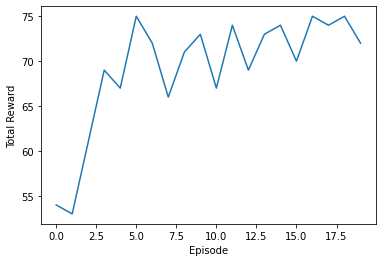

In [28]:
plt.ylabel('Total Reward')
plt.xlabel('Episode')
plt.plot([rewards[e] for e in rewards.keys()])

In [29]:
state = 0
acts = np.zeros(nr_states)
done = False

while(done != True):

        action = choose_action(state)
        next_state, reward, theta, done = act(state, action, theta)
        
        acts[state] = action
        
        total_reward += reward
        
        if(done):
            break
            
        state = next_state

In [30]:
buys_idx = np.where(acts == 0)
wait_idx = np.where(acts == 2)
sell_idx = np.where(acts == 1)

In [31]:
prices[buys_idx[0]]

0     2.911152
1     2.933361
3     3.300254
7     3.971351
10    3.870977
11    3.440964
12    3.421461
14    3.843586
16    3.601678
17    3.637581
19    3.657752
21    3.060618
24    3.228573
26    3.232456
28    3.340822
31    3.308737
32    3.361332
33    3.563290
36    3.785160
38    3.846168
39    4.471669
41    4.523748
45    4.915117
48    5.216530
49    5.172851
51    5.480165
53    5.418191
54    4.817288
56    4.829141
58    4.664261
59    4.509281
61    4.790078
63    4.825949
64    4.914973
65    4.887915
67    5.150326
70    5.763676
73    6.019790
74    5.630033
76    5.856728
77    5.798309
78    5.845173
80    5.779647
82    5.479430
83    5.278775
87    5.534393
90    5.872466
92    5.882163
94    5.817740
95    5.884356
97    5.650894
Name: Close, dtype: float64

In [32]:
df_full.set_index('Date')

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Close
Date,,,,,
1/1/2021,29111.52157,28872.82977,29280.04533,27916.62506,2.911152
1/2/2021,29333.60512,28935.81098,29601.59490,28753.41231,2.933361
1/3/2021,32154.16736,29353.64061,33064.67353,29012.92789,3.215417
1/4/2021,33002.53643,32074.10661,34452.08034,31885.58162,3.300254
1/5/2021,31431.61228,32788.58345,33358.39935,28154.11030,3.143161
...,...,...,...,...,...
4/6/2021,58843.55954,58230.67554,59243.03618,56846.96905,5.884356
4/7/2021,58040.18760,59133.65574,59484.19947,57421.85309,5.804019
4/8/2021,56508.94286,58030.62185,58645.77297,55541.90613,5.650894


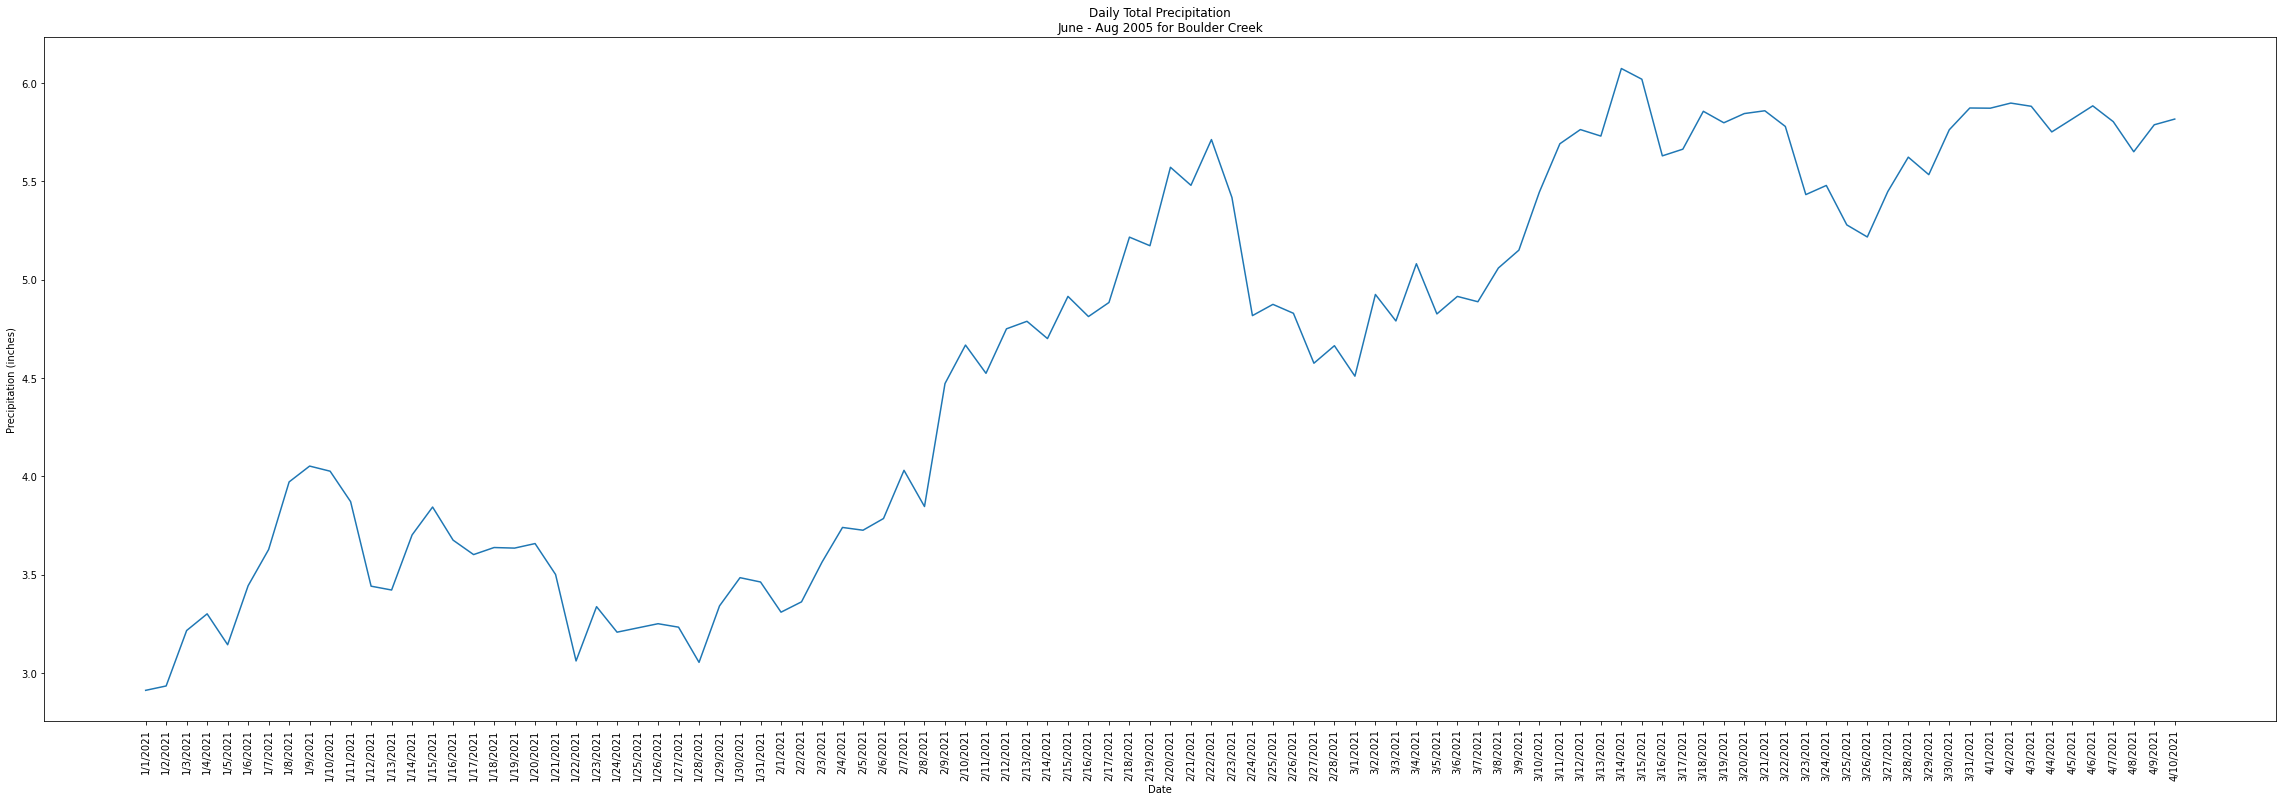

In [33]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(40, 25))
fig.subplots_adjust(bottom=0.5)
plt.xticks(rotation=90)
# Add x-axis and y-axis
ax.plot(df_full.Date,
       prices)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

plt.show()

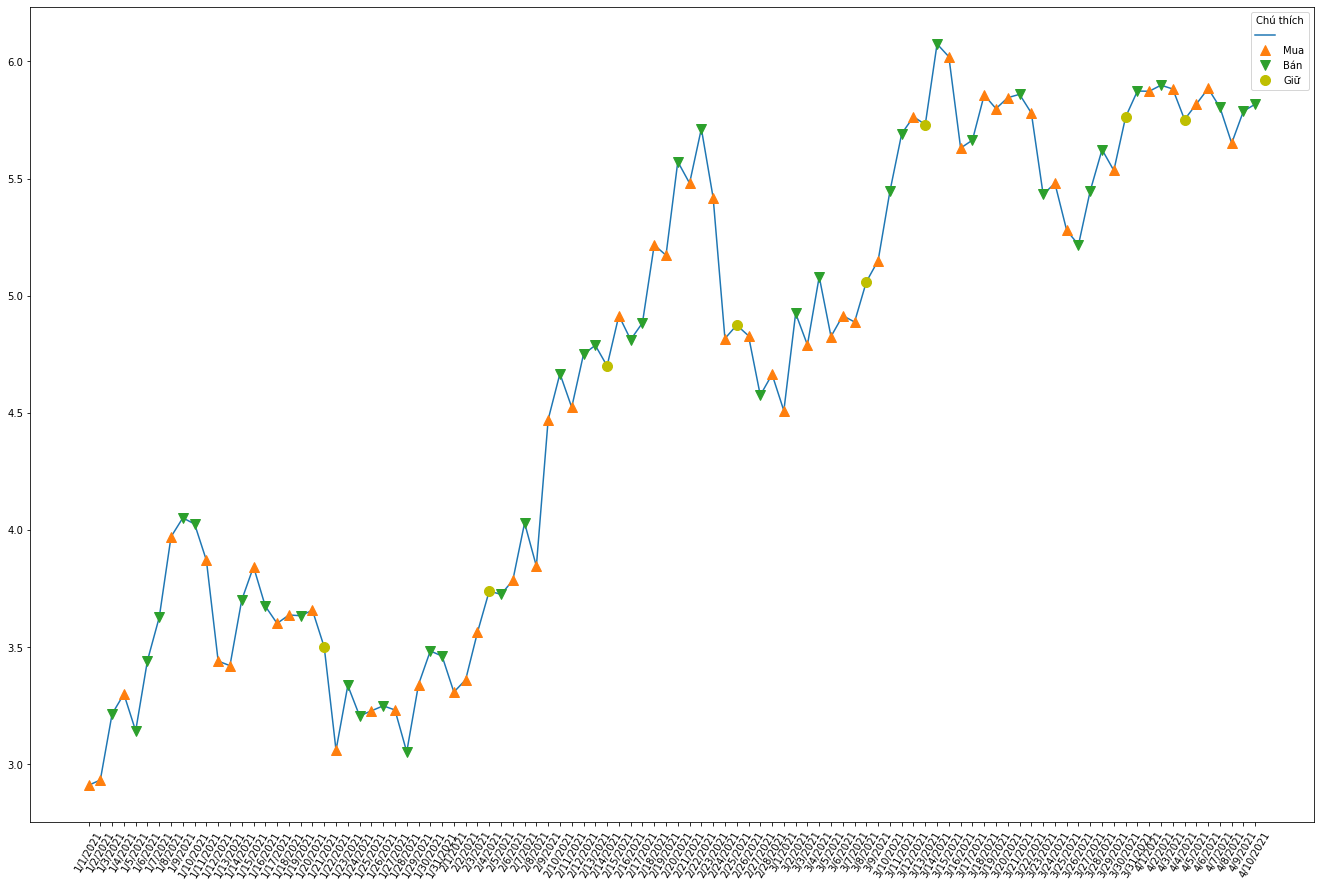

In [74]:
plt.figure(figsize=(23,15))
plt.plot(df_full.Date,prices)
plt.xticks(rotation=60)
plt.plot(prices[buys_idx[0]], '^', markersize=10)
plt.plot(prices[sell_idx[0]], 'v', markersize=10)
plt.plot(prices[wait_idx[0]], 'yo', markersize=10)
plt.legend(['','Mua','Bán','Giữ'],title="Chú thích")
plt.show()